In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [2]:
data = pd.read_csv("Mall_customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [29]:
data.replace({'Gender':{'Male':1, "Female":0}}, inplace=True)

# Data Visualization

<AxesSubplot:xlabel='Age', ylabel='Count'>

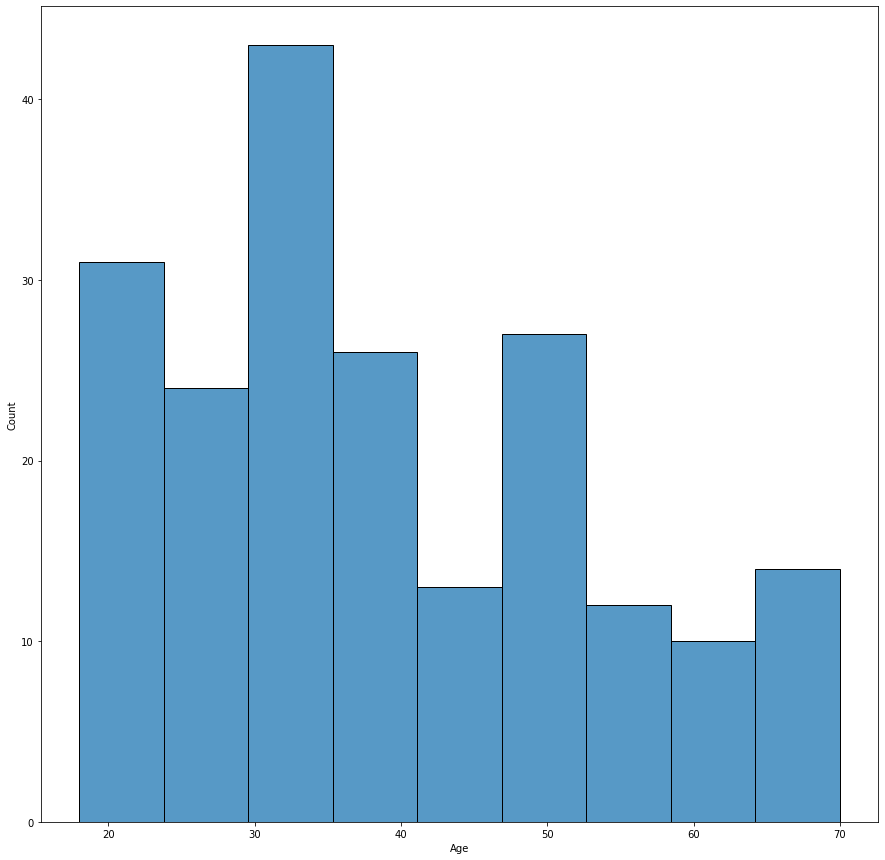

In [9]:
plt.figure(figsize=(15,15))
sns.histplot(x = 'Age', data=data)

<Figure size 720x720 with 0 Axes>

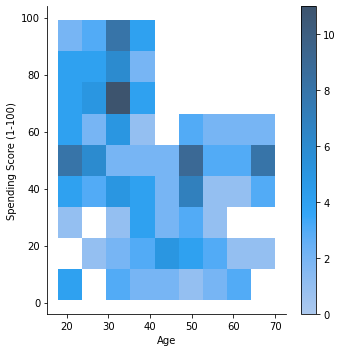

In [13]:
plt.figure(figsize=(10,10))
sns.displot(y='Spending Score (1-100)', x='Age', data=data, cbar=True)

<AxesSubplot:>

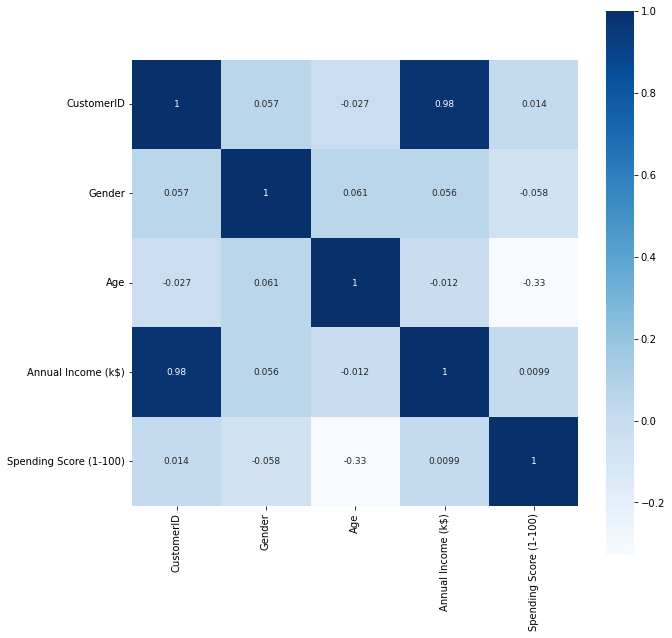

In [30]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, cmap='Blues', annot=True, square=True, annot_kws={'size':9})

<Figure size 1080x1080 with 0 Axes>

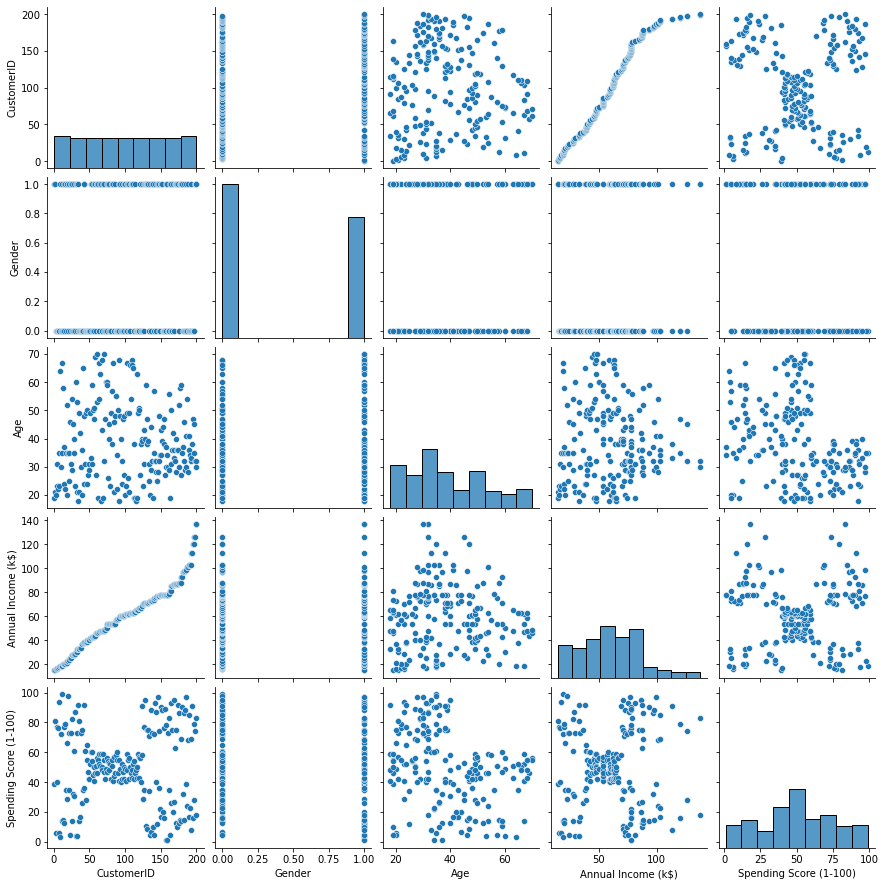

In [31]:
plt.figure(figsize=(15,15))
sns.pairplot(data)

# Splitting the data into target and feature columns

In [33]:
x = data.drop(['CustomerID','Spending Score (1-100)'], axis=1)
y = data['Spending Score (1-100)']

# Splitting the data into train and test datasets

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.1)

# Training  and Evaluating each model

In [59]:
lreg = LinearRegression()
lasso = Lasso()
ridge = Ridge(alpha=0.0001)
neighbor = KNeighborsRegressor(n_neighbors=5)
neighborc = KNeighborsClassifier(n_neighbors=7)

In [36]:
lreg.fit(x_train,y_train)

LinearRegression()

In [39]:
# Evaluation
prediction = lreg.predict(x_train)
r2_score = metrics.r2_score(prediction,y_train)
mse = metrics.mean_squared_error(prediction,y_train)
mae = metrics.mean_absolute_error(prediction, y_train)
mape = metrics.mean_absolute_percentage_error(prediction, y_train)
print("Linear Regression training data")
print(f"R squared : {r2_score}")
print(f"Mean square error : {mse}")
print(f"Mean absolute error : {mae}")
print(f"Mean absolute percentage error : {mape}")
      

Linear Regression training data
R squared : -9.660156104391639
Mean square error : 599.2662939295925
Mean absolute error : 20.25139587501101
Mean absolute percentage error : 0.40186693555561204


In [40]:
prediction = lreg.predict(x_test)
r2_score = metrics.r2_score(prediction,y_test)
mse = metrics.mean_squared_error(prediction,y_test)
mae = metrics.mean_absolute_error(prediction, y_test)
mape = metrics.mean_absolute_percentage_error(prediction, y_test)
print("Linear Regression test data")
print(f"R squared : {r2_score}")
print(f"Mean square error : {mse}")
print(f"Mean absolute error : {mae}")
print(f"Mean absolute percentage error : {mape}")

Linear Regression test data
R squared : -10.657460020372637
Mean square error : 552.7377589090217
Mean absolute error : 20.377522975970844
Mean absolute percentage error : 0.4098043241462929


In [43]:
# The linear regression model is grossly underfitting

In [64]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.0001)

In [49]:
prediction = ridge.predict(x_train)
r2_score = metrics.r2_score(prediction,y_train)
mse = metrics.mean_squared_error(prediction,y_train)
mae = metrics.mean_absolute_error(prediction, y_train)
mape = metrics.mean_absolute_percentage_error(prediction, y_train)
print("Ridge Regression training data")
print(f"R squared : {r2_score}")
print(f"Mean square error : {mse}")
print(f"Mean absolute error : {mae}")
print(f"Mean absolute percentage error : {mape}")
      

Ridge Regression training data
R squared : -9.660156726106422
Mean square error : 599.2662939295958
Mean absolute error : 20.251395811988456
Mean absolute percentage error : 0.4018669314438264


In [65]:
prediction = ridge.predict(x_test)
r2_score = metrics.r2_score(prediction,y_test)
mse = metrics.mean_squared_error(prediction,y_test)
mae = metrics.mean_absolute_error(prediction, y_test)
mape = metrics.mean_absolute_percentage_error(prediction, y_test)
print("Linear Regression test data")
print(f"R squared : {r2_score}")
print(f"Mean square error : {mse}")
print(f"Mean absolute error : {mae}")
print(f"Mean absolute percentage error : {mape}")

Linear Regression test data
R squared : -10.657461953698311
Mean square error : 552.737768353139
Mean absolute error : 20.377523146526574
Mean absolute percentage error : 0.40980432321647486


In [60]:
neighbor.fit(x_train,y_train)

KNeighborsRegressor()

In [61]:
prediction = neighbor.predict(x_train)
r2_score = metrics.r2_score(prediction,y_train)
mse = metrics.mean_squared_error(prediction,y_train)
mae = metrics.mean_absolute_error(prediction, y_train)
mape = metrics.mean_absolute_percentage_error(prediction, y_train)
print("KNeighborRegression training data")
print(f"R squared : {r2_score}")
print(f"Mean square error : {mse}")
print(f"Mean absolute error : {mae}")
print(f"Mean absolute percentage error : {mape}")
      

KNeighborRegression training data
R squared : -0.18795625117773707
Mean square error : 331.46244444444443
Mean absolute error : 12.676666666666668
Mean absolute percentage error : 0.26843507313625703


In [62]:
prediction = neighbor.predict(x_test)
r2_score = metrics.r2_score(prediction,y_test)
mse = metrics.mean_squared_error(prediction,y_test)
mae = metrics.mean_absolute_error(prediction, y_test)
mape = metrics.mean_absolute_percentage_error(prediction, y_test)
print("KNeighborRegression test data")
print(f"R squared : {r2_score}")
print(f"Mean square error : {mse}")
print(f"Mean absolute error : {mae}")
print(f"Mean absolute percentage error : {mape}")

KNeighborRegression test data
R squared : 0.19743243930152266
Mean square error : 317.356
Mean absolute error : 14.719999999999999
Mean absolute percentage error : 0.38912085720454287
